In [1]:
import sys

sys.path.append('../../../')
sys.path.append('/usr/local/lib/wingpro10')
import wingdbstub

In [2]:
from hackrf import ScanHackRF
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import welch
from IPython.display import display, clear_output

# Scanning

Scanning refers to the process of systematically checking a range of frequencies to detect signals.
It allows the detection of the presence of signals within specific bands, such as radio frequencies.
In this context, the scanning is performed using the HackRF device, which samples frequencies over a
defined bandwidth. The scanning operation collects frequency data, which can then be processed
and visualized to understand the signal characteristics in the specified bands.

In [3]:
history = []


def custom_callback(data_freqs, sweep_config):
    global history

    if len(history) > 20:
        history.pop(0)

    clear_output(wait=True)
    plt.figure(figsize=(16, 7), dpi=90)

    for i, f in enumerate(data_freqs):

        signal = data_freqs[f]
        w, x = welch(signal, fs=sweep_config['sample_rate'], nperseg=256)

        sorted_indices = np.argsort(w)
        w_sorted = w[sorted_indices] + f + sweep_config['step_offset']
        x_sorted = x[sorted_indices]

        history.append(x_sorted)
        for j, h in enumerate(history[::1]):
            plt.plot(
                w_sorted / 1e6 + (j * 0.5),
                h + (j * 0.5e-9),
                color=f'C{i}',
                zorder=100 - j,
                linewidth=3,
            )
            plt.fill_between(
                w_sorted / 1e6 + (j * 0.5),
                -100,
                h + (j * 0.5e-9),
                color='w',
                zorder=100 - j,
            )

        plt.xlabel("Frequency (MHz)")
        plt.ylabel("Power Spectral Density (V²/Hz)")
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

    plt.ylim(-1e-9, 15e-9)
    plt.show()

# Sweep Mode

The `scan` method of the `ScanHackRF` class allows for an asynchronous frequency sweep
over specified bands of frequencies. The sweep process systematically scans through a
defined range of frequencies, collecting data at each step based on the provided
parameters like sample rate, step width, and buffer sizes.

## Key Parameters

- **bands**: A list of frequency tuples that define the start and end frequencies to scan in MHz.
- **sample_rate**: The rate at which data is sampled, typically 20e6 samples per second.
- **step_width**: The width of each frequency step in Hz, allowing adjustments to how fine the sweep is.
- **callback**: A user-defined function that processes the scanned frequency data, allowing for
visualization or further analysis of the received signals.

The scanning process can detect signals within the specified bands and display the
results in real time with the help of the provided callback function. The use of
maximum 20 sweeps ensures that older data does not overwhelm the memory by keeping
track of only the most recent data.

The overall design provides flexibility for users to adapt the scanning parameters
according to their specific requirements, enhancing the ability to detect and analyze
the signals effectively.

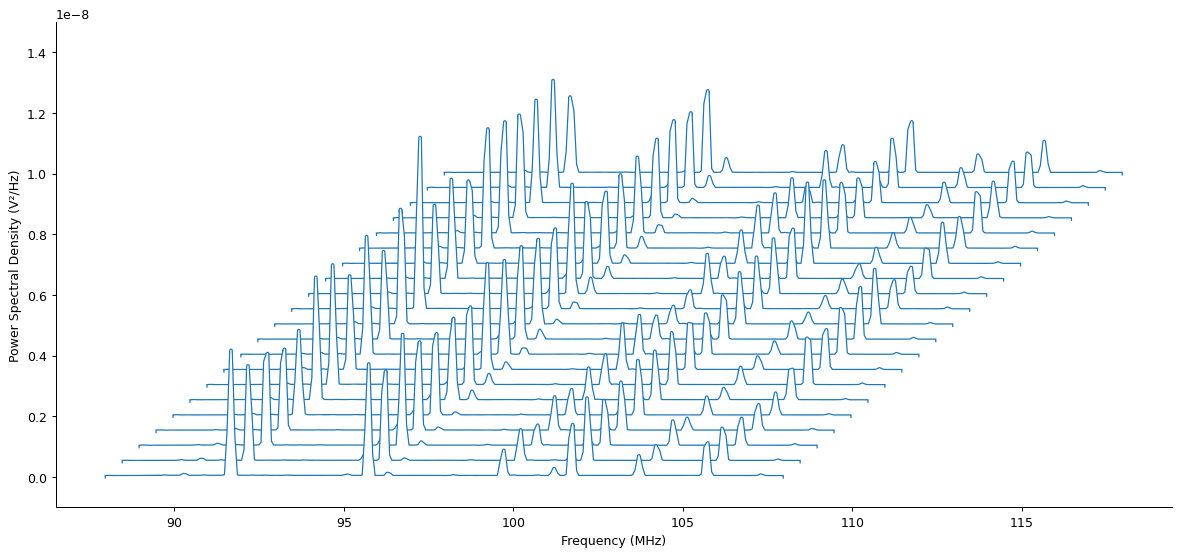

In [ ]:
scanhackrf = ScanHackRF(0)
await scanhackrf.scan(
    bands=[
        # List of frequency tuples (start_freq, end_freq) in MHz
        (88, 108),
        # (150, 250),
    ],
    sample_rate=20e6,
    step_width=20e6,
    step_offset=None,
    read_num_blocks=1,
    buffer_num_blocks=1,
    callback=custom_callback,
    interleaved=False,
)

# Preview Sweep Frequency Influence 

In [4]:
from hackrf.utils import preview_scan

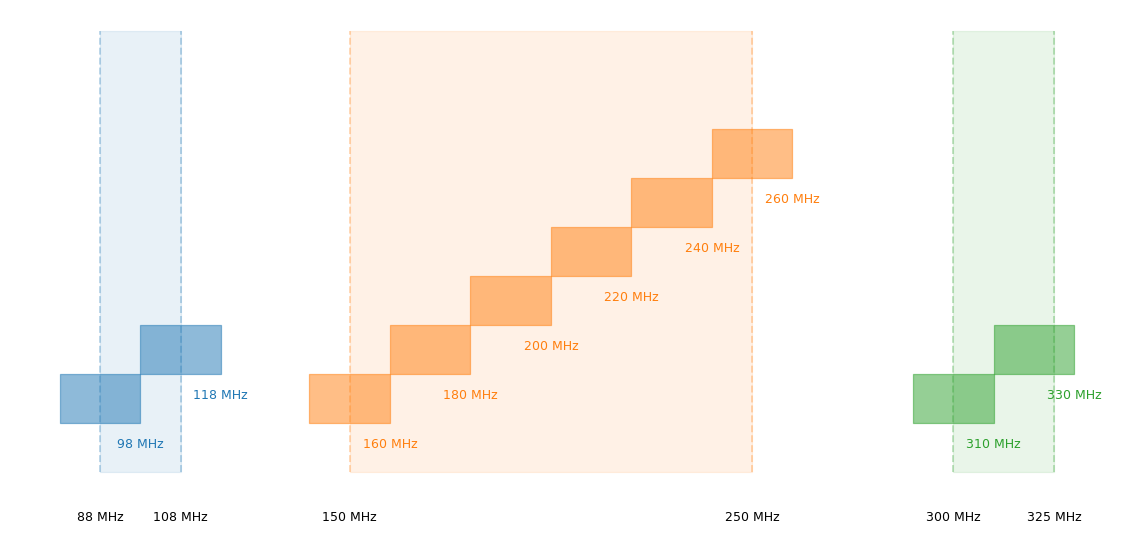

In [6]:
preview_scan(
    bands=[
        (88, 108),
        (150, 250),
        (300, 325),
    ],
    sample_rate=20e6,
    step_width=20e6,
    step_offset=None,

    top=0.4,
    save='_images/sweep.png'
);

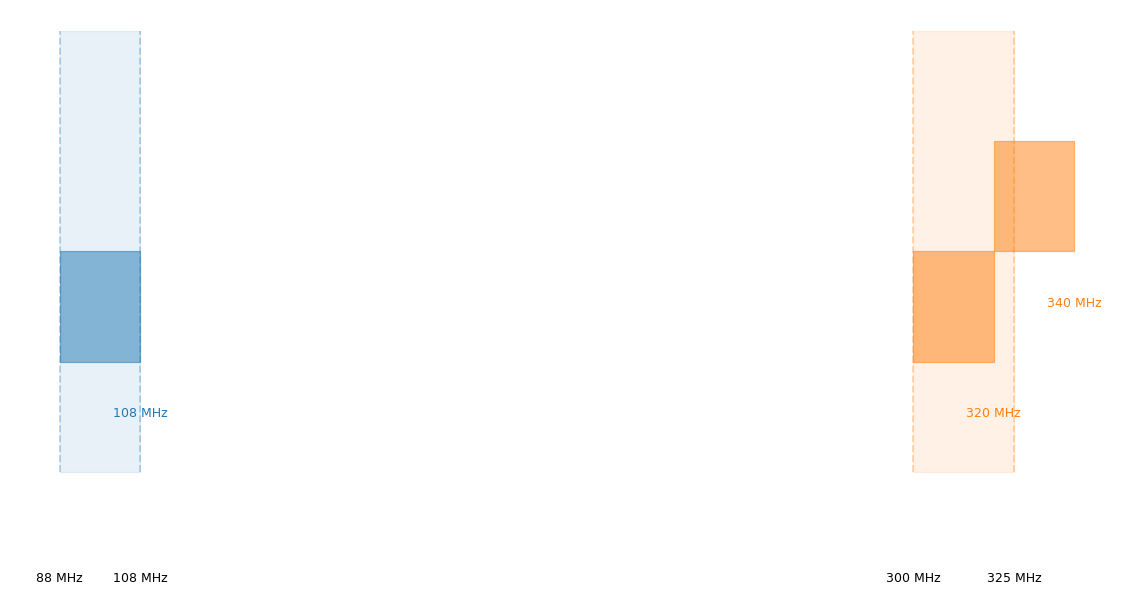

In [7]:
preview_scan(
    bands=[
        (88, 108),
        (300, 325),
    ],
    sample_rate=20e6,
    step_width=20e6,
    step_offset=0,

    top=0.15,
);

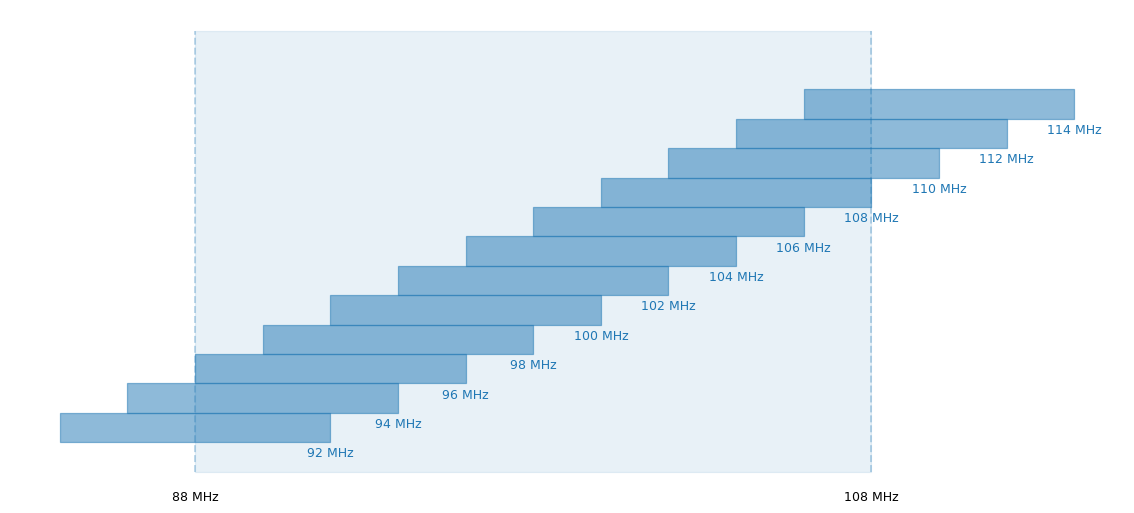

In [8]:
preview_scan(
    bands=[
        (88, 108),
    ],
    sample_rate=8e6,
    step_width=2e6,
    step_offset=None,

    top=0.7,
    save = '_images/sweepFM.png'
);